# Bike Sharing Case Study

### Problem Statement:
Built a linear regression model to predict shared bike demand post-quarantine. Identified key variables affecting revenue and assessed model accuracy in describing bike demand.

## Step 1: Reading and Understanding the Data

### Reading the Bike sharing dataset

In [210]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [211]:
#Read the csv file
data  = pd.read_csv('day.csv')
data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


### Inspecting the Dataset

In [212]:
data.shape

(730, 16)

In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [214]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Quality Checks

In [215]:
# Checking for duplicate values

bike_dup = data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 16)

In [216]:
data.shape

(730, 16)

### Data Cleaning

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:
- instant : This is a index column, we have a default index for the same purpose

- dteday : This column has date. Since, we already have separate year and month column, we can carry out our analysis without this column.

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two column.  

We will save the new dataframe as data1, so that the original dataset is preserved for any future analysis/validation

In [217]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [218]:
data1 = data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualising Continuous Variables

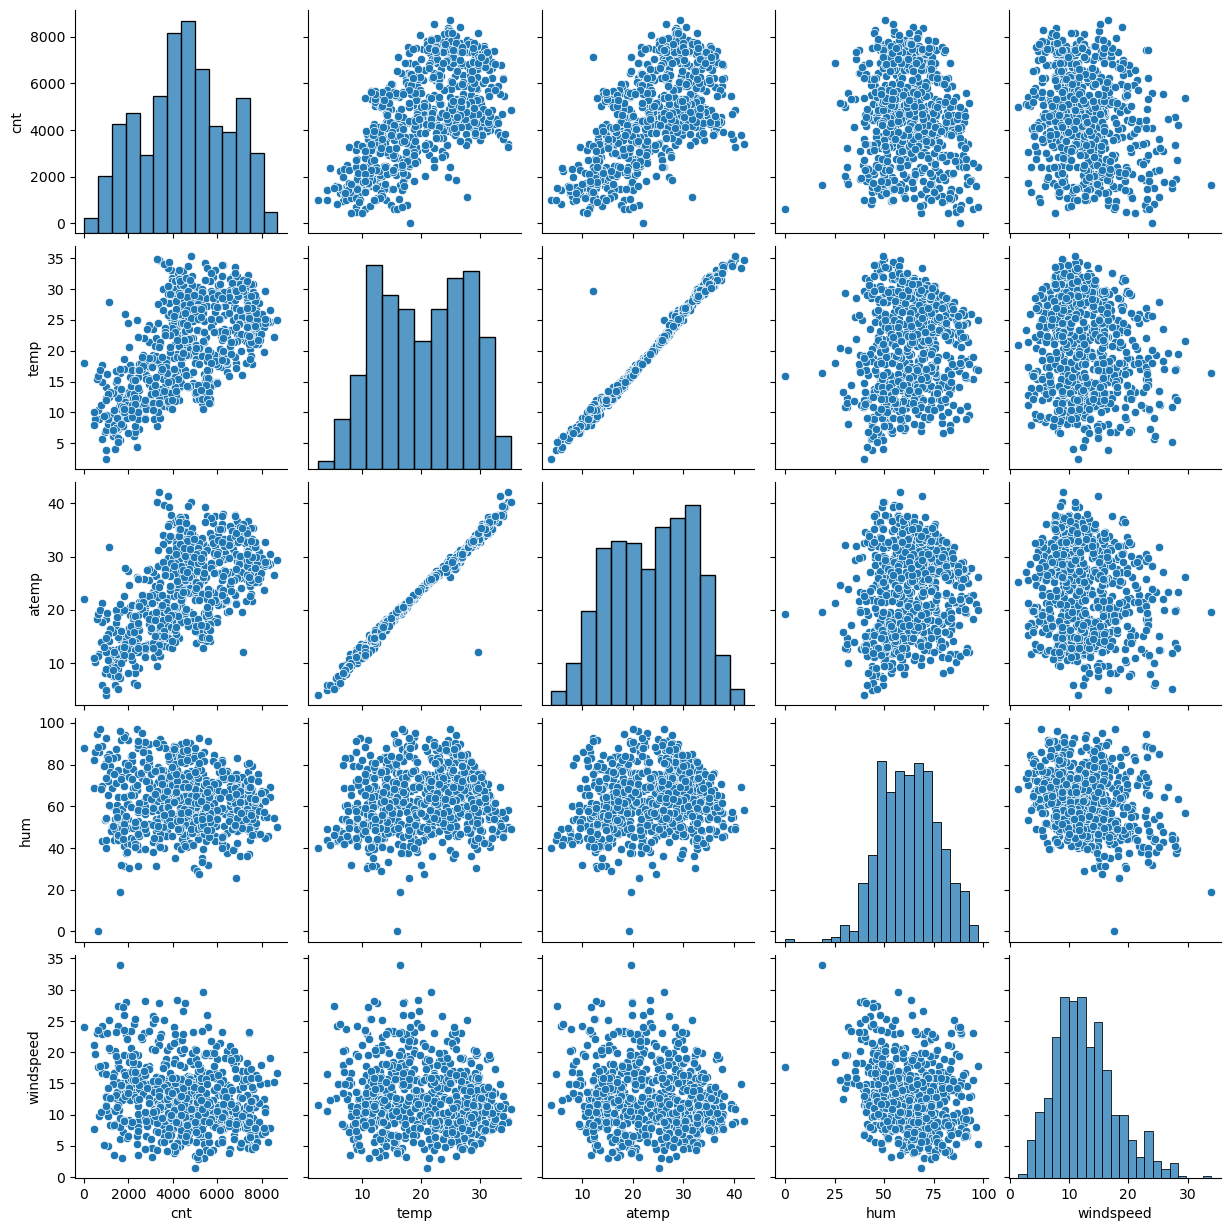

In [219]:
sns.pairplot(data=data1, vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Visualising Categorical Variables : Using a boxplot

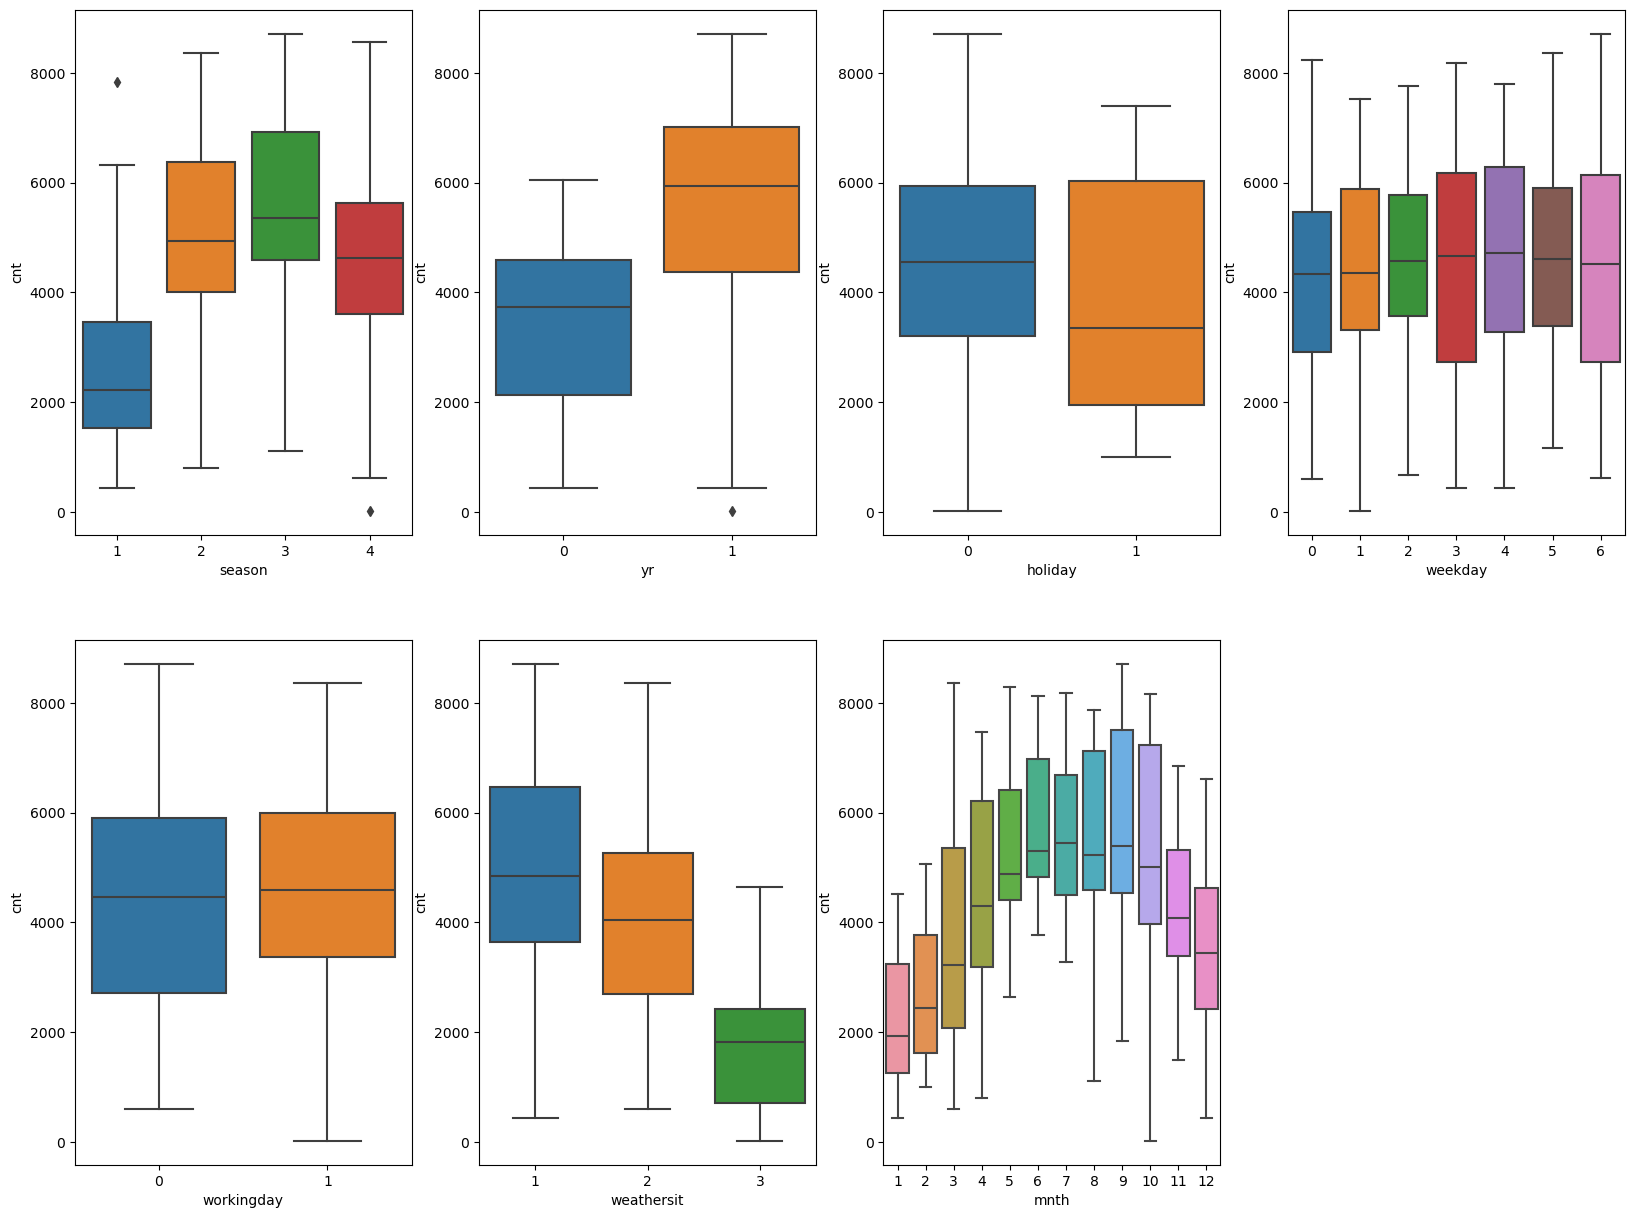

In [220]:
plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data1)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data1)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data1)
plt.subplot(2,4,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = data1)
plt.subplot(2,4,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = data1)
plt.subplot(2,4,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data1)
plt.subplot(2,4,7)
sns.boxplot(x = 'mnth', y = 'cnt', data = data1)
plt.show()

### <font color = 'red'> Learnings: </font>
The graph clearly shows the qualitative distributions of the data. If the model identifies the important predictors, these graphs can boost our confidence in the model's predictions.
•	For the variable "season," we can see that the category 3: Fall has the highest median, indicating high demand during this season. It is lowest for 1: Spring
.
•	The year 2019 had a higher user count compared to 201
8.
•	The count of rentals is fairly consistent throughout the we
ek.
•	There are no users during heavy rain or snow, indicating adverse weather conditions. The highest count is seen when the weather is clear or partly cloudy.
•	The number of rentals peaked in September but declined in December, likely due to significant snowfall.
•	The count of users is lower during holidays.
•	The "Workingday" boxplot shows that most bookings occur between 4000 and 6000, with a consistent median count of users throughout the week, indicating minimal difference in bookings between working days and no days.days.




## Step 3: Data Preparation

#### Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [221]:
import calendar
data1['mnth'] = data1['mnth'].apply(lambda x: calendar.month_abbr[x])

In [222]:
# Maping seasons
data1.season = data1.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})

In [223]:
# Mapping weathersit
data1.weathersit = data1.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [224]:
#Mapping Weekday
data1.weekday = data1.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

In [225]:
# Lets overlook the dataframe now

data1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Creating Dummy Variables
The variables `mnth` `weekday` `season` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
We will create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [226]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = data1[['season','mnth','weekday','weathersit']]

In [227]:
dummy = pd.get_dummies(dummy,drop_first=True)

In [228]:
# Adding the dummy variables to the original dataset
data1 = pd.concat([dummy,data1],axis = 1)

In [229]:
#Deleting the orginal columns season.weathersit,weekday,mnth

data1.drop(['season', 'weathersit', 'weekday', 'mnth'],axis=1,inplace=True)

data1.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,True,False,False,False,False,False,True,False,False,False,...,False,True,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,True,False,False,False,False,False,True,False,False,False,...,False,False,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [230]:
data1.shape

(730, 30)

In [231]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   season_Spring                 730 non-null    bool   
 1   season_Summer                 730 non-null    bool   
 2   season_Winter                 730 non-null    bool   
 3   mnth_Aug                      730 non-null    bool   
 4   mnth_Dec                      730 non-null    bool   
 5   mnth_Feb                      730 non-null    bool   
 6   mnth_Jan                      730 non-null    bool   
 7   mnth_Jul                      730 non-null    bool   
 8   mnth_Jun                      730 non-null    bool   
 9   mnth_Mar                      730 non-null    bool   
 10  mnth_May                      730 non-null    bool   
 11  mnth_Nov                      730 non-null    bool   
 12  mnth_Oct                      730 non-null    bool   
 13  mnth_

## Step 4: Splitting the Data 
The first basic step for regression is performing a train-test split.

In [232]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, train_size = 0.7, random_state = 100)

In [233]:
print(train.shape)
print(test.shape)

(510, 30)
(220, 30)


## Step 5: Rescaling the Features
Although scaling doesn't impact the linear model in the case of simple linear regression, however while performing multiplwe linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.  So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.

In [234]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [235]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [236]:
train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,False,False,False,False,False,False,False,True,False,False,...,False,False,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,True,False,False,False,False,False,False,False,False,True,...,False,True,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,True,False,False,False,True,False,False,False,False,False,...,False,False,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,False,True,False,False,False,False,False,False,False,False,...,False,True,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,False,True,False,False,False,False,False,False,False,False,...,False,True,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [237]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the coefficients to see which variables are highly correlated

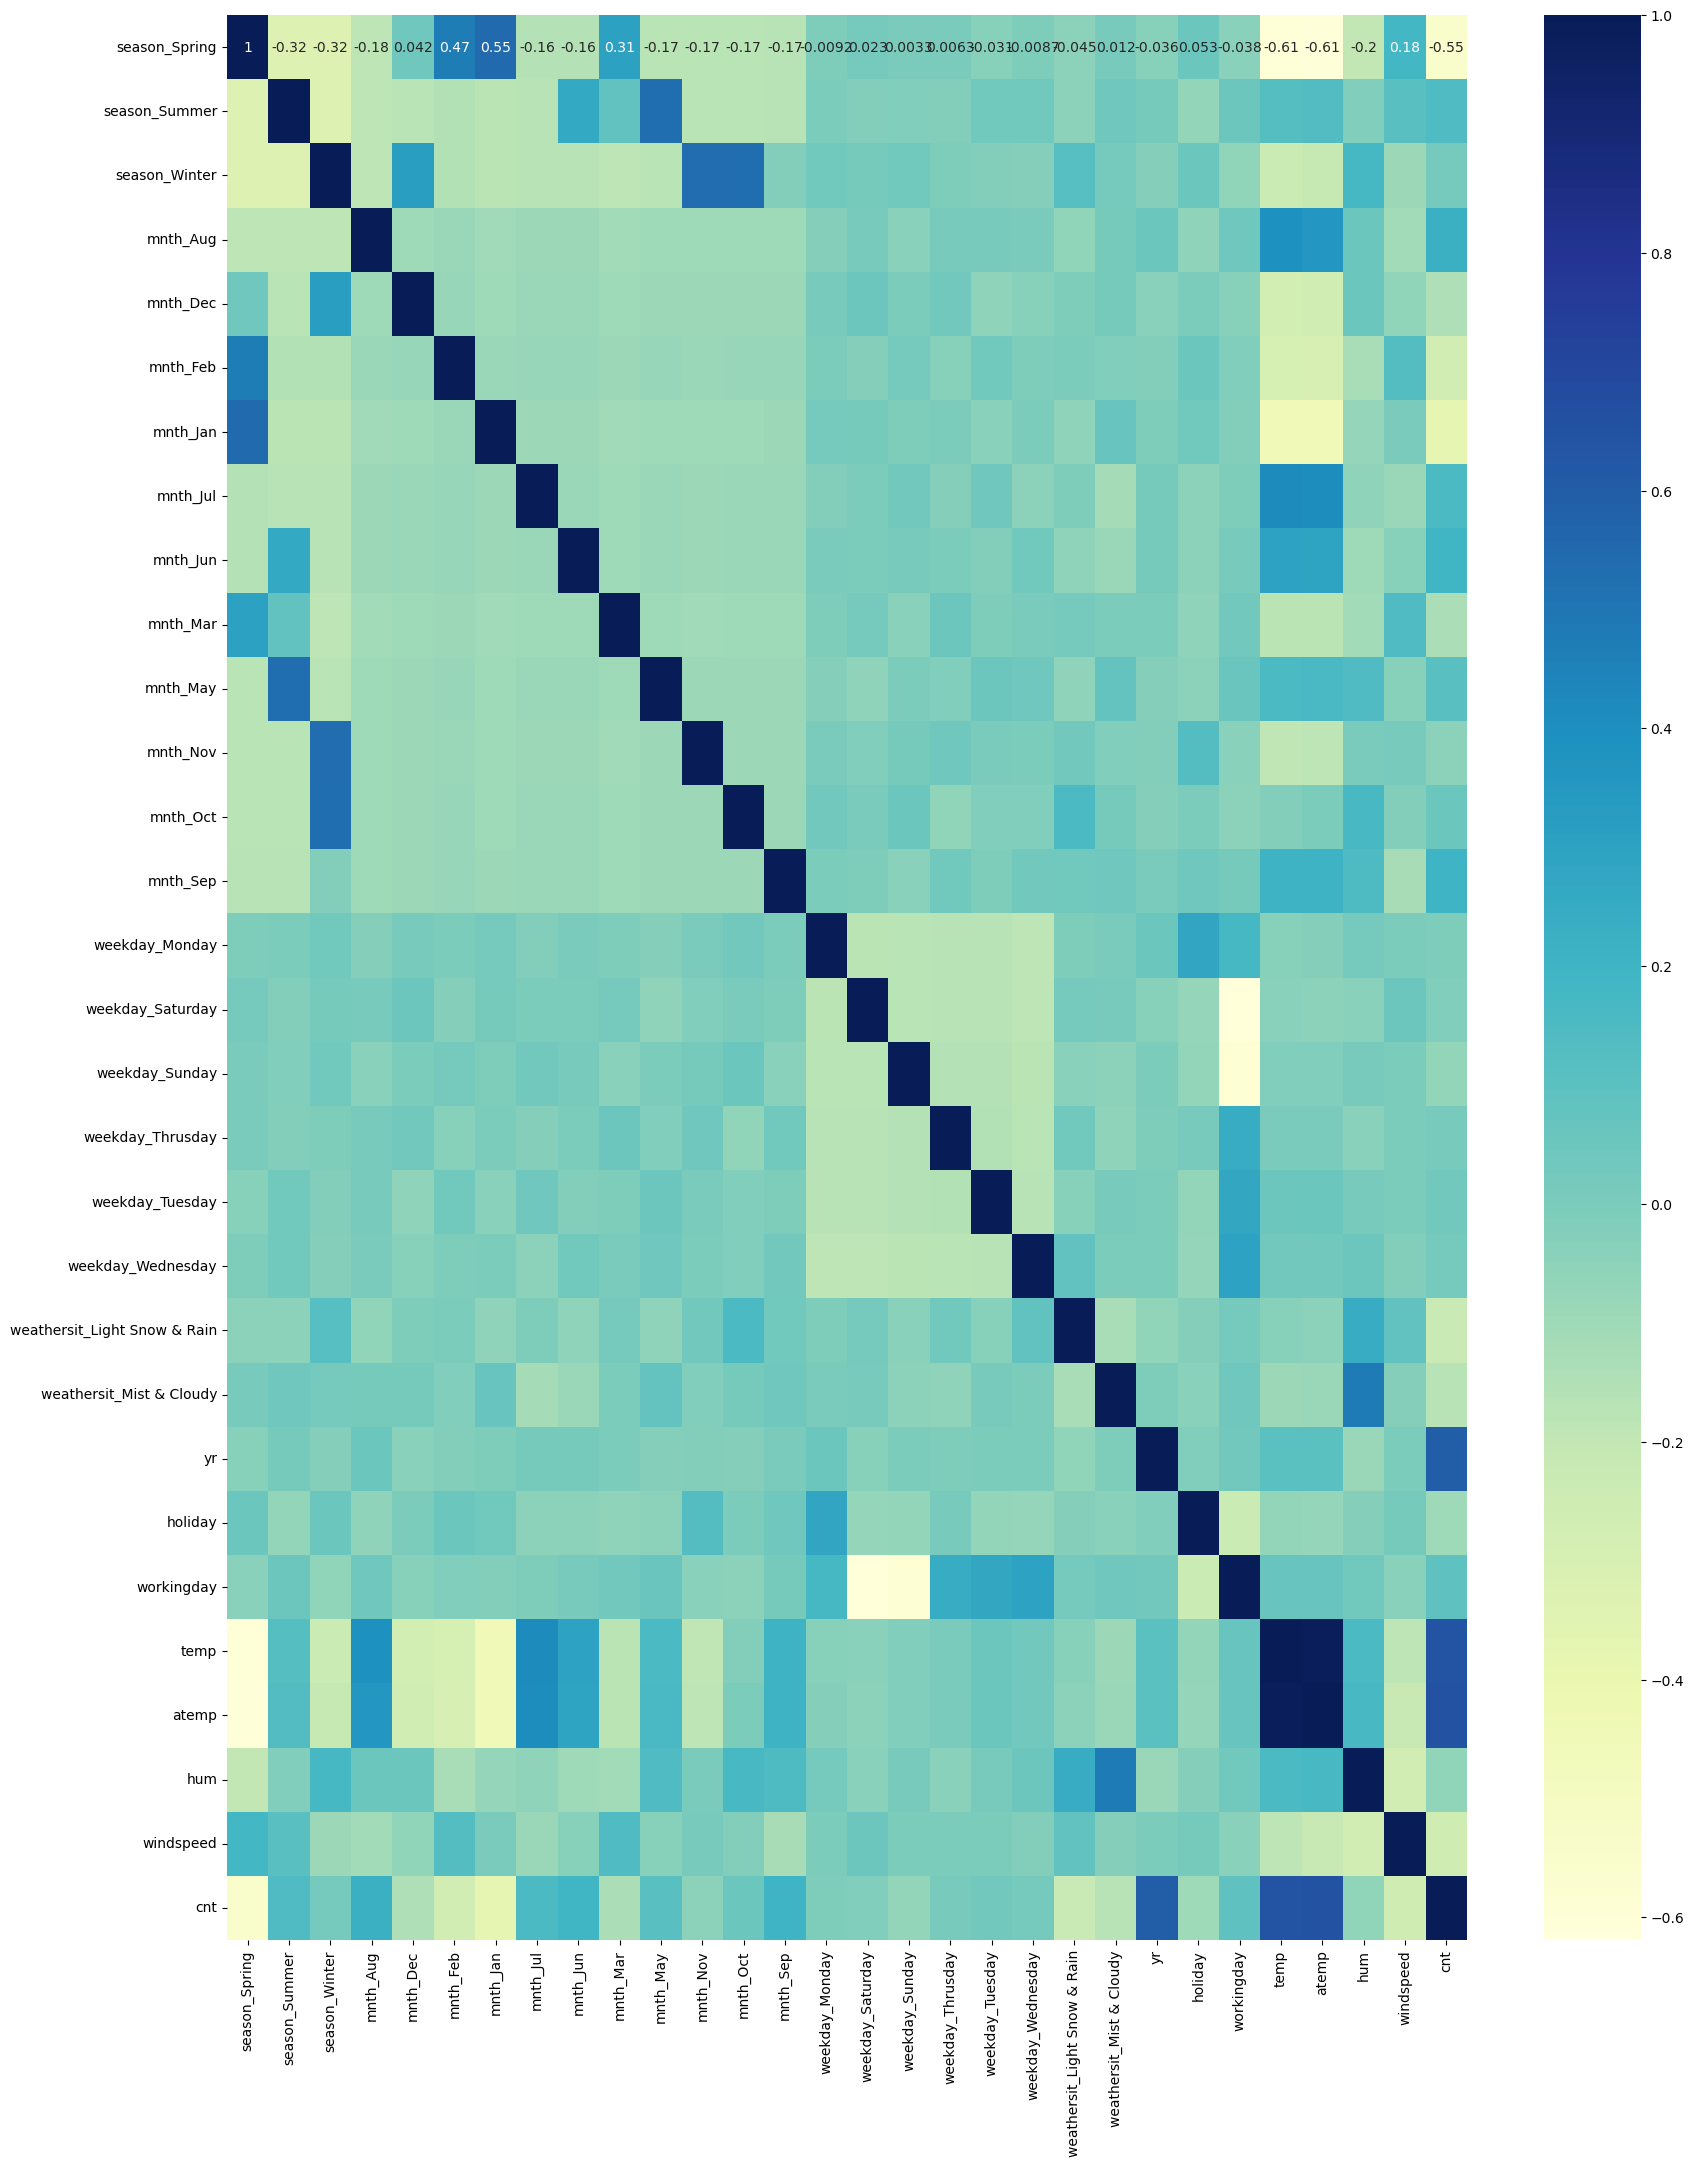

In [238]:
plt.figure(figsize = (20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### <font color = 'red'> Learnings: </font>
As can be seen from the map, `atemp` and `temp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

### Dividing into X and Y sets for the model building

In [239]:
y_train = train.pop('cnt')
X_train = train

In [240]:
y_train.shape

(510,)

## Step 6: Building a linear model

APPROACH USED :

We will use a mixed approach to build the model.  
Here we are using `RFE` approach for feature selection and then we will use the `statsmodel` approach for building the model 

### Feature Selection

We start with 15 variables.  
We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [241]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [242]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [243]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 15),
 ('mnth_May', False, 6),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 7),
 ('weekday_Thrusday', False, 11),
 ('weekday_Tuesday', False, 10),
 ('weekday_Wednesday', False, 12),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [244]:
col = X_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Saturday',
       'weathersit_Light Snow & Rain', 'weathersit_Mist & Cloudy', 'yr',
       'holiday', 'workingday', 'temp', 'hum', 'windspeed'],
      dtype='object')

In [245]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday', 'atemp'],
      dtype='object')

#### Building model using statsmodel for the detailed statistics

In [246]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

#### Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [247]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)

In [248]:
X_train_lm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Saturday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,hum,windspeed
576,1.0,False,False,False,False,True,False,False,False,False,1,0,1,0.815169,0.725633,0.264686
426,1.0,True,False,False,False,False,False,True,False,True,1,0,0,0.442393,0.640189,0.255342
728,1.0,True,False,False,False,False,False,False,False,False,1,0,0,0.245101,0.498067,0.663106
482,1.0,False,True,False,False,False,False,True,False,True,1,0,0,0.395666,0.504508,0.188475
111,1.0,False,True,False,False,False,False,False,False,True,0,0,1,0.345824,0.751824,0.380981


#### Building the first linear models using statsmodels

In [249]:
print(X_train_lm.dtypes)


const                           float64
season_Spring                      bool
season_Summer                      bool
season_Winter                      bool
mnth_Jan                           bool
mnth_Jul                           bool
mnth_Sep                           bool
weekday_Saturday                   bool
weathersit_Light Snow & Rain       bool
weathersit_Mist & Cloudy           bool
yr                                int64
holiday                           int64
workingday                        int64
temp                            float64
hum                             float64
windspeed                       float64
dtype: object


In [250]:
print(y_train.dtypes)

float64


In [251]:
# Drop rows with missing values
X_train_lm = X_train_lm.dropna()
y_train = y_train[X_train_lm.index]  # Ensure y_train matches X_train_lm after dropping

# Alternatively, fill missing values
X_train_lm = X_train_lm.fillna(method='ffill')  # Forward fill


####  Convert Data Types and check the Objects

In [252]:
print(X_train_lm.index)
print(y_train.index)

# Align indices if necessary
y_train = y_train[X_train_lm.index]


Index([576, 426, 728, 482, 111, 580, 500, 479, 472, 455,
       ...
       316, 228, 655, 280, 526, 578,  53, 350,  79, 520],
      dtype='int64', length=510)
Index([576, 426, 728, 482, 111, 580, 500, 479, 472, 455,
       ...
       316, 228, 655, 280, 526, 578,  53, 350,  79, 520],
      dtype='int64', length=510)


In [253]:
X_train_lm = X_train_lm.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')


In [254]:
X_train_lm = X_train_lm.astype(float)
y_train = y_train.astype(float)


In [255]:
lm_1 = sm.OLS(y_train, X_train_lm).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.22e-191
Time:                        13:57:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2519      0.036      6.969      0.000       0.181       0.323
season_Spring                   -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                    0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                    0.0933      0.017      5.403      0.000       0.059       0.127
mnth_Jan                        -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_Jul                        -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_Sep                         0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Saturday                 0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow & Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist & Cloudy        -0.0563      0.010     -5.439      0.000      -0.077      -0.036
yr                               0.2305      0.008     28.795      0.000       0.215       0.246
holiday                         -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                       0.0433      0.012      3.762      0.000       0.021       0.066
temp                             0.5096      0.034     14.837      0.000       0.442       0.577
hum                             -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                       -0.1863      0.025     -7.310      0.000      -0.236      -0.136
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### <font color = 'red'> Learnings : </font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and check VIF. 

### Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other.

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [256]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [258]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Ensure all columns are numeric
X_train_rfe = X_train_rfe.apply(pd.to_numeric, errors='coerce')

# Fill missing values if necessary
X_train_rfe = X_train_rfe.fillna(0)

# Calculate VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

# Sort and display VIFs
vif_sorted = vif.sort_values(by='VIF', ascending=False)
print(vif_sorted)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [257]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
#X_train_rfe=X_train_lm
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_lm.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

#### In general we want VIF to be less than 5. We will drop feature `hum` which has highest VIF of 30.89

In [ ]:
# dropping season_Spring since its vif > 5

X_train_rfe = X_train_rfe.drop(['hum'], axis=1)

#### Model 2

In [ ]:
X_train_lm = sm.add_constant(X_train_rfe)
lm_2 = sm.OLS(y_train, X_train_lm).fit()
lm_2.summary()

In [ ]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [round(variance_inflation_factor(X_train_rfe.values, i), 2) for i in range(X_train_rfe.shape[1])]

vif.sort_values(by = 'VIF', ascending=False)

#### <font color = 'red'> Learnings : </font>

Now as you can see, the VIFs and p-values both are within an acceptable range. Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [ ]:
y_train_pred = lm_2.predict(X_train_lm)

In [ ]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  
plt.xlabel('Errors', fontsize = 18)  
plt.show()

#### <font color = 'red'> Learnings: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#### Cross-verifying the above conclusion using a qq-plot as well:

In [ ]:
# Plot the qq-plot of the error terms

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

#### <font color='red'>Learnings:</font>
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Applying the scaling on the test sets

In [ ]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

In [ ]:
test.describe()

#### Dividing into X_test and y_test

In [ ]:
y_test = test.pop('cnt')
X_test = test

In [ ]:
X_test = sm.add_constant(X_test[X_train_rfe.columns])
y_test_pred = lm_2.predict(X_test)

#### Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [ ]:
from sklearn.metrics import r2_score
print('r2_score of train dataset', r2_score(y_train, y_train_pred))
print('r2_score of test dataset', r2_score(y_test, y_test_pred))

#### <font color = 'red'> Learnings: </font>

We can see that the `r_squared on the test set is 0.813` and the `r-squared on the trained set 0.839` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Model Evaluation

Plotting the graph for actual versus predicted values.

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

#### <font color='red'>Learnings:</font> 
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Getting the variable names and the coefficient values for the final equation of the best fitted line

In [ ]:
param = pd.DataFrame(lm_2.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,15))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.245 + 0.4387 \times  temp + 0.2342  \times  yr + 0.0868 \times season Winter + 0.0687 \times mnth Sept + 0.0348 \times season Summer - 0.0395 \times mnth Nov - 0.0428 \times mnth Dec - 0.0500 \times mnth Jan - 0.0500 \times mnth Jul - 0.0712 \times season Spring - 0.0800 \times weathersit Mist Cloudy - 0.0917 \times holiday - 0.1584 \times windspeed - 0.2917 \times weathersit Light Snow Rain $

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.438717)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.291749)
 - year (0.234455)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## <font color='red'> Final Recommendations for the Company: </font>

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand.
- Holiday time seems to be least interesting bor biking, little motavation and marketing might help here.